<a href="https://colab.research.google.com/github/vmjs1234/TIMEGPT-TABULA-RDL/blob/main/anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#| hide
!pip install -Uqq nixtla

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
from nixtla import NixtlaClient

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key =  'nixak-fcqNO2C0XCBQQozD5OW6GzOw4wmvrNCoP2xTklrHEThEU8vvytDeHZulh4Ja99fmFgnTyywsPfkVJzxh'
)

In [4]:
df = pd.read_csv('daily-total-female-births-CA.csv')
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [6]:
df = df.rename(columns={'date': 'ds'})

In [8]:
df = df.rename(columns={'births': 'y'})

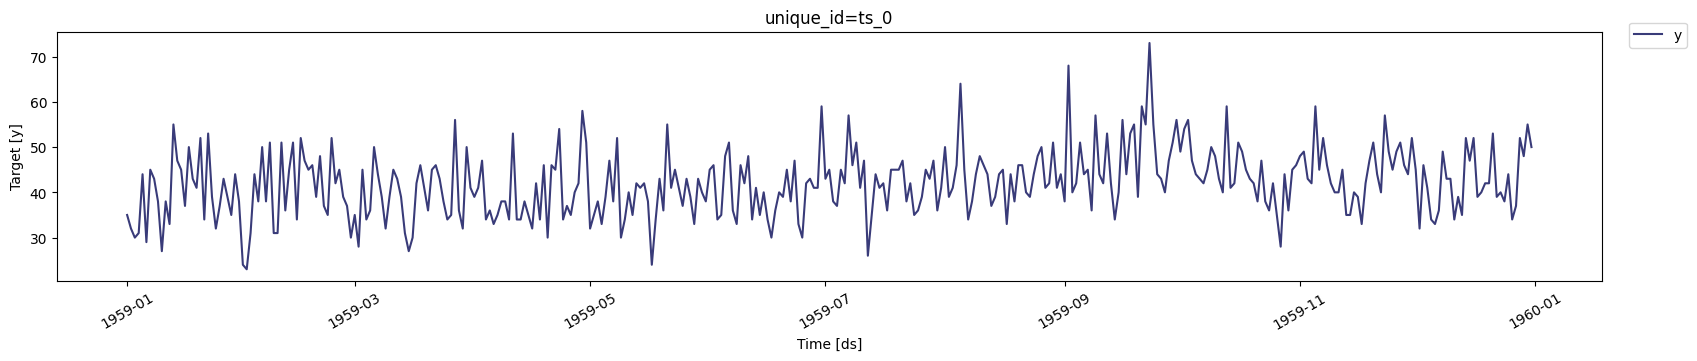

In [9]:
nixtla_client.plot(df, max_insample_length=365)


In [10]:
anomalies_df = nixtla_client.detect_anomalies(df, freq='D')
anomalies_df.head()

,ds,y,TimeGPT,TimeGPT-hi-99,TimeGPT-lo-99,anomaly
0,1959-01-30,38,39.330116,58.187400,20.472832,False
1,1959-01-31,24,37.649140,56.506424,18.791855,False
2,1959-02-01,23,38.978737,57.836020,20.121452,False
3,1959-02-02,31,41.133247,59.990532,22.275963,False
4,1959-02-03,44,41.330093,60.187378,22.472809,False


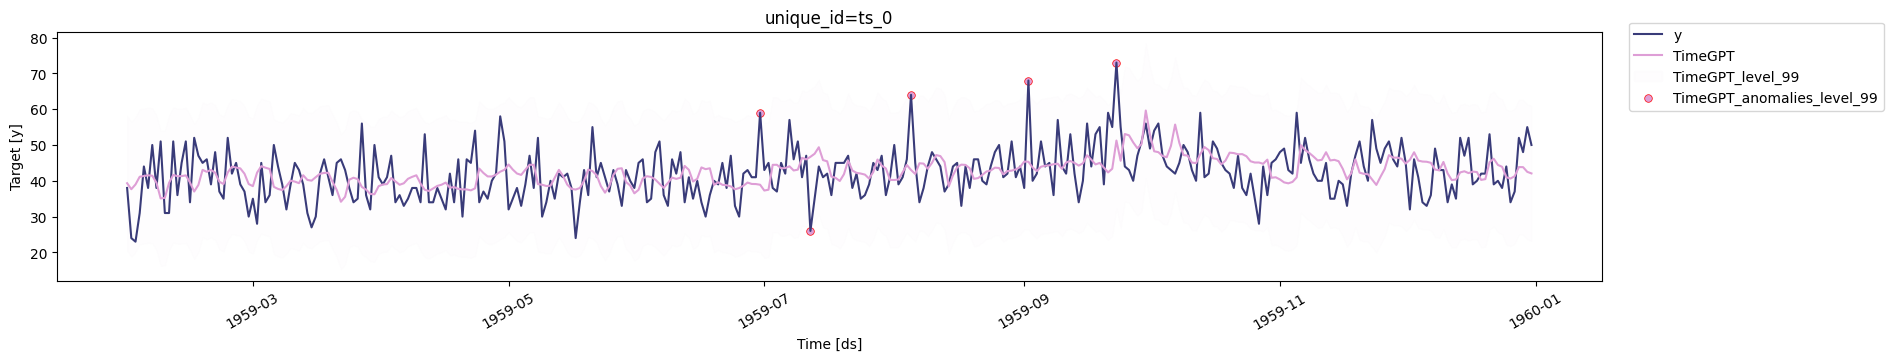

In [11]:
nixtla_client.plot(df, anomalies_df)

In [12]:
anomalies_df_x = nixtla_client.detect_anomalies(
    df,
    freq='D',
    date_features=['month', 'year'],
    date_features_to_one_hot=True,
)

<Axes: ylabel='features'>

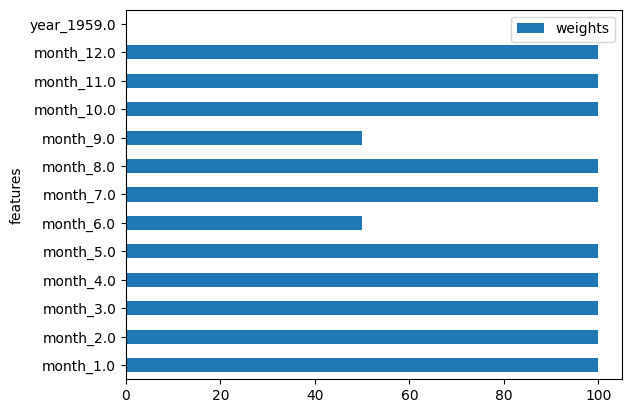

In [13]:
nixtla_client.weights_x.plot.barh(x='features', y='weights')

In [14]:
anomalies_df = nixtla_client.detect_anomalies(
    df,
    freq='D',
    level=70
)

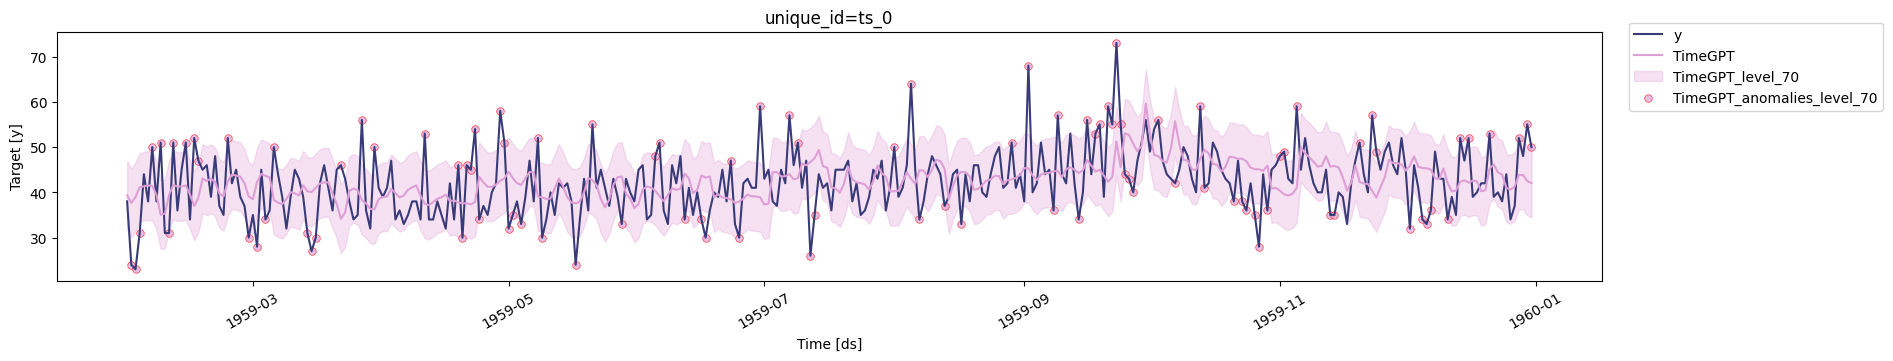

In [15]:
nixtla_client.plot(df, anomalies_df)